In [2]:
%pylab inline
import sqlite3,copy,gc,os,random
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
import multiprocessing as mp
import time
import scipy,collections

matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/Users/sn0wfree/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def detectedHDFTable(HDFfile_path):
    #'share.h5'
    with pd.HDFStore(HDFfile_path) as share:
        return share.keys()
    

In [4]:
share =pd.read_hdf('share.h5','share')
share_with_BGgroup=pd.read_hdf('share.h5','share_with_BGgroup')
share_with_gsGroup=pd.read_hdf('share.h5','share_with_gsGroup')

In [5]:
share_with_GS =pd.read_hdf('temp.h5','temp')
share_with_GS=share_with_GS[(True-share_with_GS['TICKER'].isin(['A','AA','ARE','Y','Z','AND','W','X','D','V','F']))]  



/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


In [130]:
sgs =share_with_GS[['date','Period']]
sgs.columns =['index','Period']
#gs_pe =pd.merge(gs_perioedrebalanceed.reset_index(),  sgs,on='index')   
gs_pe.columns=pd.MultiIndex.from_tuples(
                 [(u'date','date'),     (u'Group0', u'ewrtPRC'),
           (u'Group0', u'vwrtPRC'), (u'Group0', u'MarketValue'),
            (u'Group0', u'SHROUT'),     (u'Group1', u'ewrtPRC'),
           (u'Group1', u'vwrtPRC'), (u'Group1', u'MarketValue'),
            (u'Group1', u'SHROUT'),     (u'Group2', u'ewrtPRC'),
           (u'Group2', u'vwrtPRC'), (u'Group2', u'MarketValue'),
            (u'Group2', u'SHROUT'),     (u'Group3', u'ewrtPRC'),
           (u'Group3', u'vwrtPRC'), (u'Group3', u'MarketValue'),
            (u'Group3', u'SHROUT'),     (u'Group4', u'ewrtPRC'),
           (u'Group4', u'vwrtPRC'), (u'Group4', u'MarketValue'),
            (u'Group4', u'SHROUT'),     (u'Group5', u'ewrtPRC'),
           (u'Group5', u'vwrtPRC'), (u'Group5', u'MarketValue'),
            (u'Group5', u'SHROUT'),     (u'Group6', u'ewrtPRC'),
           (u'Group6', u'vwrtPRC'), (u'Group6', u'MarketValue'),
            (u'Group6', u'SHROUT'),     (u'Group7', u'ewrtPRC'),
           (u'Group7', u'vwrtPRC'), (u'Group7', u'MarketValue'),
            (u'Group7', u'SHROUT'),     (u'Group8', u'ewrtPRC'),
           (u'Group8', u'vwrtPRC'), (u'Group8', u'MarketValue'),
            (u'Group8', u'SHROUT'),     (u'Group9', u'ewrtPRC'),
           (u'Group9', u'vwrtPRC'), (u'Group9', u'MarketValue'),
            (u'Group9', u'SHROUT'),         (u'Period','date')],names=['Group', 'Variable'])
#gs_pe[(u'date','date')]=pd.to_datetime(gs_pe[(u'date','date')],format='%Y%m%d')
#gs_pe =gs_pe.drop_duplicates()
#gs_pe =gs_pe.set_index((u'date','date'))

ValueError: Length mismatch: Expected axis has 41 elements, new values have 42 elements

/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/io/pytables.py:262: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0_level0] [items->None]

  f = lambda store: store.put(key, value, **kwargs)
/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/io/pytables.py:262: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis0_level1] [items->None]

  f = lambda store: store.put(key, value, **kwargs)
/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/io/pytables.py:262: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items_level0] [items->None]

  f = lambda store: store.put(key, value, **kwargs)
/Users/sn0wfree/anaconda/lib/python2.7/site-packag

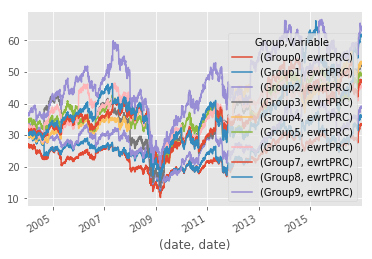

In [355]:
ewrtPRC2.plot()
gs_pe.to_hdf('regression_data_csv/gsall.h5','gsall')

Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


Group,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9
Variable,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000
mean,0.000175,0.000187,0.000178,0.000300,0.000305,0.000226,0.000223,0.000247,0.000364,0.000299
std,0.014236,0.015389,0.015464,0.016481,0.016226,0.014977,0.015564,0.015554,0.017067,0.015960
min,-0.121485,-0.158604,-0.152503,-0.177845,-0.199154,-0.118959,-0.146902,-0.168273,-0.155295,-0.154611
25%,-0.006582,-0.006748,-0.006235,-0.005666,-0.005723,-0.006046,-0.005735,-0.005613,-0.005707,-0.006121
50%,0.000416,0.000646,0.000781,0.000745,0.000772,0.000746,0.000733,0.000822,0.000876,0.000806
75%,0.006919,0.007012,0.007272,0.006626,0.006795,0.006844,0.006610,0.006717,0.006710,0.007103
max,0.132817,0.157261,0.205951,0.271270,0.233174,0.190546,0.241458,0.159694,0.262478,0.262752


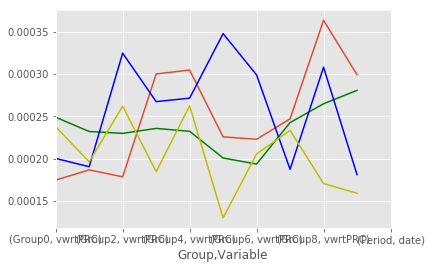

In [274]:
def adjustprice(rr,period):
    rr=rr.sort_index() 
    adjust_price={}
    for period,df in rr.groupby(period):
        

        if period == 0 or period == 2010:
            base=0
            div=[1]*df.shape[1]
            last_period_price=df.iloc[-1]
            df=df/div

        else:
            base =period-1
            #print base
            div = df.iloc[0]/adjust_price[base]['last_period_price']
            last_period_price =df.iloc[-1]/div
            df=df/div
        adjust_price.update({period:{'df':df,'base':base,'div':div,'last_period_price':last_period_price}})

    return pd.concat([ v['df'] for v in adjust_price.values()]).sort_index(),adjust_price


ewrtPRC2 =gs_pe.xs('ewrtPRC',level='Variable', axis=1,drop_level=False).drop_duplicates()
perio =gs_pe.xs('date',level='Variable', axis=1,drop_level=False)


print (ewrtPRC2.diff()/ewrtPRC2.shift()).mean().plot(kind='line')

sd =adjustprice(pd.concat([ewrtPRC2,perio],axis=1),[('Period','date')])[0]
print (sd.diff()/sd.shift(1)).mean().plot(color='g')

print (vwrtPRC2.diff()/vwrtPRC2.shift(1)).mean().plot(color='b')
sd2 =adjustprice(pd.concat([vwrtPRC2,perio],axis=1),[('Period','date')])[0]
print (sd2.diff()/sd2.shift(1)).mean().plot(color='y')

(ewrtPRC2.diff()/ewrtPRC2.shift()).describe()
#adjustprice(vwrtPRC2,('Period','date'))
#gs_perioedrebalanceed =pd.concat(temp,axis=1)   

In [75]:
import collections
#t=collections.OrderedDict()
t=[]
for period,period_df in share_with_GS.groupby('Period'):
    temp =pd.Series({ticker:ticker_df.GoogleSearch.mean() for ticker,ticker_df in period_df.groupby('TICKER')})
    tre =temp.sort_values().dropna()
    chunk=10
    chunk_size =tre.shape[0]/chunk
    d={}
    for i in xrange(chunk):
        ewrtPRC={}
        vwrtPRC={}
        MarketValue={}
        SHROUT={}
        
        if i+1<chunk:
            locals()['Group_%d'%i]=tre.iloc[i*chunk_size:(i+1)*chunk_size]
            #d.update({'Group%d'%i:list(locals()['Group_%d'%i].index)})
        else:
            #print (i*chunk_size,-1)
            locals()['Group_%d'%i]=tre.iloc[i*chunk_size:,]
            #d.update({'Group%d'%i:list(locals()['Group_%d'%i].index)})
        dt = period_df[period_df.TICKER.isin(list(locals()['Group_%d'%i].index))].dropna()
        for date,date_df in dt.groupby('date'):
            ewrtPRC.update({date:date_df.PRC.mean()})
            MarketValue.update({date:date_df.MarketValue.sum()})
            SHROUT.update({date:date_df.SHROUT.sum()})

            vwrtPRC.update({date:date_df.MarketValue.sum()/date_df.SHROUT.sum()})
        #pd.concat([pd.Series(ewrtPRC),pd.Series(vwrtPRC),pd.Series(MarketValue),pd.Series(SHROUT)],axis=1,keys=['ewrtPRC','vwrtPRC','MarketValue','SHROUT'])
        d.update({'Group%d'%i:pd.concat([pd.Series(ewrtPRC),pd.Series(vwrtPRC),pd.Series(MarketValue),pd.Series(SHROUT)],axis=1,keys=['ewrtPRC','vwrtPRC','MarketValue','SHROUT'])})
    t.append(d)  
G_group2=[  u'Group0',   u'Group1',   u'Group2',   u'Group3',   u'Group4',u'Group5',   u'Group6',   u'Group7',   u'Group8',   u'Group9']
temp=[]
for name in G_group2:
    locals()[name] =pd.concat([p[name] for p in t])
    locals()[name].columns =pd.MultiIndex.from_tuples(zip([name]*4,list(locals()[name])),names=['Group', 'Variable'])
    temp.append(locals()[name])
pd.concat(temp,axis=1)     

Group        Group0                                        Group1             \
Variable    ewrtPRC    vwrtPRC   MarketValue    SHROUT    ewrtPRC    vwrtPRC   
20040102  26.227153  28.626393  2.877940e+08  10053451  28.668561  27.548383   
20040105  26.540774  29.138703  2.929445e+08  10053451  29.003683  28.049066   
20040106  26.519312  28.792880  2.981941e+08  10356523  29.017496  28.125985   
20040107  26.511471  28.809585  2.983671e+08  10356523  29.180072  28.349480   
20040108  26.646275  29.178869  3.021916e+08  10356523  29.374137  28.536016   
20040109  26.399732  28.962394  2.999497e+08  10356523  29.283993  28.371161   
20040112  26.691913  29.319862  3.036518e+08  10356523  29.501777  28.499062   
20040113  26.612710  29.059331  3.009563e+08  10356615  29.366748  28.197569   
20040114  26.722601  29.162409  3.020238e+08  10356615  29.535086  28.459662   
20040115  26.763536  29.428170  3.047762e+08  10356615  29.562532  28.587406   
20040116  26.846036  29.648261  3.070556e+08  10356615  29.807360  28.898656   
20040120  27.072384  29.662739  3.072056e+08  10356615  29.920950  28.852398   
20040121  27.136087  29.578985  3.063382e+08  10356615  29.971929  28.788223   
20040122  26.812486  29.274826  3.031884e+08  10356625  29.756664  28.589129   
20040123  26.937210  29.155370  3.019118e+08  10355272  29.903488  28.533835   
20040126  27.289336  29.659589  3.064557e+08  10332434  30.135457  28.908859   
20040127  27.150131  29.186936  3.015721e+08  10332434  29.915186  28.607056   
20040128  26.794036  28.917069  2.987846e+08  10332466  29.433143  28.278156   
20040129  26.696190  28.850606  2.980979e+08  10332466  29.219964  28.390044   
20040130  26.505333  29.007592  2.999265e+08  10339585  29.420214  28.343828   
20040202  26.322394  28.971187  2.990063e+08  10320817  29.470679  28.325072   
20040203  26.306956  29.068234  3.000079e+08  10320817  29.534264  28.488316   
20040204  25.888716  28.632693  2.955128e+08  10320817  29.050000  28.063470   
20040205  26.005533  28.805131  2.972933e+08  10320845  29.173270  28.162621   
20040206  26.517839  29.449380  3.039436e+08  10320883  29.724330  28.603906   
20040209  26.559715  29.382222  3.032495e+08  10320849  29.816645  28.485225   
20040210  26.764474  29.630229  3.058147e+08  10321038  30.009993  28.574900   
20040211  26.931618  29.993818  3.085451e+08  10286956  30.207518  28.928882   
20040212  26.744243  29.760026  3.061401e+08  10286956  30.050340  28.794611   
20040213  26.567478  29.583499  3.043313e+08  10287199  29.771709  28.684471   
...             ...        ...           ...       ...        ...        ...   
20161117  31.423591  34.806747  4.308086e+08  12377157  34.955934  33.676355   
20161118  31.390415  34.798953  4.307121e+08  12377157  35.022959  33.578019   
20161121  31.592448  35.013748  4.333706e+08  12377156  35.148616  33.751324   
20161122  31.910286  35.269980  4.365420e+08  12377156  35.334464  33.809059   
20161123  32.154144  35.384886  4.379643e+08  12377156  35.542180  34.012421   
20161125  32.277764  35.527587  4.397305e+08  12377156  35.659343  34.107985   
20161128  32.020337  35.297178  4.368793e+08  12377174  35.289014  33.777915   
20161129  31.988124  35.322746  4.371958e+08  12377174  35.195990  33.731963   
20161130  31.896531  35.336807  4.372690e+08  12374320  34.910694  33.478796   
20161201  31.871936  35.239146  4.360605e+08  12374320  34.805885  33.248689   
20161202  31.880203  35.130528  4.347164e+08  12374320  34.798199  33.493178   
20161205  32.399287  35.503781  4.393351e+08  12374320  35.404300  34.000380   
20161206  32.781267  35.881188  4.440053e+08  12374320  35.764860  34.282632   
20161207  33.043781  36.234662  4.483797e+08  12374330  35.973531  34.492085   
20161208  33.490889  36.464019  4.512535e+08  12375309  36.396661  34.581620   
20161209  33.507392  36.485473  4.483243e+08  12287747  36.500769  34.692737   
20161212  33.128330  36.092320  4.434958e+08  12287816  35.990542  34.358625   


In [203]:
#share_with_BGgroup=pd.read_hdf('share.h5','share_with_BGgroup')

share_with_BGgroup






,TICKER,PRC,SHROUT,RET,MarketValue,NEWS_HEAT_READ_DAVG
date,,,,,,
2010-02-18,A,30.980,348892,0.011427,1.080867e+07,0.0
2010-02-19,A,31.200,348892,0.007101,1.088543e+07,0.0
2010-02-22,A,31.150,348892,-0.001603,1.086799e+07,0.0
2010-02-23,A,30.850,348892,-0.009631,1.076332e+07,0.0
2010-02-24,A,31.230,348892,0.012318,1.089590e+07,0.0
2010-02-25,A,31.090,348892,-0.004483,1.084705e+07,0.0
2010-02-26,A,31.460,348892,0.011901,1.097614e+07,0.0
2010-03-01,A,32.090,348892,0.020025,1.119594e+07,0.0
2010-03-02,A,32.360,348892,0.008414,1.129015e+07,0.0


In [284]:
BG_t=[]
for year,df in share_with_BGgroup.groupby(lambda x:x.year):
    df['date']=df.index
    df['date']=df['date'].dt.strftime('%Y%m%d')
    
    temp =pd.Series({ticker:ticker_df.NEWS_HEAT_READ_DAVG.mean() for ticker,ticker_df in df.groupby('TICKER')})
    tre =temp.sort_values().dropna()
    chunk=10
    chunk_size =tre.shape[0]/chunk
    d={}
    for i in xrange(chunk):
        ewrtPRC={}
        vwrtPRC={}
        MarketValue={}
        SHROUT={}
        
        if i+1<chunk:
            locals()['Group_%d'%i]=tre.iloc[i*chunk_size:(i+1)*chunk_size]
            #d.update({'Group%d'%i:list(locals()['Group_%d'%i].index)})
        else:
            #print (i*chunk_size,-1)
            locals()['Group_%d'%i]=tre.iloc[i*chunk_size:,]
            #d.update({'Group%d'%i:list(locals()['Group_%d'%i].index)})
        dt = df[df.TICKER.isin(list(locals()['Group_%d'%i].index))].dropna()
        for date,date_df in dt.groupby('date'):
            ewrtPRC.update({date:date_df.PRC.mean()})
            MarketValue.update({date:date_df.MarketValue.sum()})
            SHROUT.update({date:date_df.SHROUT.sum()})

            vwrtPRC.update({date:date_df.MarketValue.sum()/date_df.SHROUT.sum()})
        d.update({'Group%d'%i:pd.concat([pd.Series(ewrtPRC),pd.Series(vwrtPRC),pd.Series(MarketValue),pd.Series(SHROUT)],axis=1,keys=['ewrtPRC','vwrtPRC','MarketValue','SHROUT'])})
    BG_t.append(d)  
G_group2=[  u'Group0',   u'Group1',   u'Group2',   u'Group3',   u'Group4',u'Group5',   u'Group6',   u'Group7',   u'Group8',   u'Group9']
temp=[]
for name in G_group2:
    locals()[name] =pd.concat([p[name] for p in BG_t])
    locals()[name].columns =pd.MultiIndex.from_tuples(zip([name]*4,list(locals()[name])),names=['Group', 'Variable'])
    temp.append(locals()[name])
bgco =pd.concat(temp,axis=1)    
        

/Users/sn0wfree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sn0wfree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sn0wfree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will ra

In [347]:
bgvwrtPRC =bgco.xs(('vwrtPRC'),level='Variable', axis=1,drop_level=False).dropna()
bgco=bgco.dropna()
bgco.to_csv('t.csv')

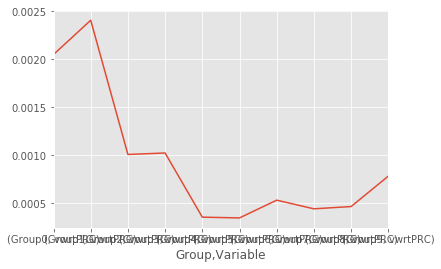

In [354]:
bgvwrtPRC.describe()
(bgvwrtPRC.diff()/bgvwrtPRC.shift(1)).mean().plot()

In [311]:
bgco_adjust.describe()
#(sdbg.diff()/sdbg.shift()).mean().plot(kind='barh')

Group          Group0                                                Group1  \
Variable      ewrtPRC      vwrtPRC   MarketValue        SHROUT      ewrtPRC   
count     1651.000000  1651.000000  1.651000e+03  1.651000e+03  1659.000000   
mean        37.692441    37.304665  6.188439e+08  1.702154e+07    37.028832   
std         16.420819    10.222274  2.615613e+08  6.729852e+06    10.680715   
min         13.599068    16.058528  2.077216e+06  1.095491e+05    14.169012   
25%         25.020130    28.875879  4.661117e+08  1.260163e+07    29.707167   
50%         29.099115    36.922606  6.109432e+08  1.706779e+07    36.497571   
75%         52.648655    41.349569  7.488653e+08  2.078279e+07    43.011071   
max         90.518868    66.188832  1.485064e+09  4.053584e+07    65.426933   

Group                                                   Group2               \
Variable      vwrtPRC   MarketValue        SHROUT      ewrtPRC      vwrtPRC   
count     1659.000000  1.659000e+03  1.659000e+03  1652.000000  1652.000000   
mean        58.401767  2.420529e+08  4.872002e+06    47.587221    36.191586   
std         28.420078  7.853406e+07  2.234707e+06    26.654158    11.942721   
min         16.938228  1.317906e+06  4.715077e+04     2.848962     3.853391   
25%         31.988070  1.768009e+08  3.363697e+06    30.340166    26.398398   
50%         57.482125  2.412549e+08  4.068131e+06    35.006830    33.359207   
75%         74.713250  2.952550e+08  5.675775e+06    58.635771    47.415650   
max        145.522071  5.180352e+08  1.078258e+07   172.210137    67.348717   

Group         ...             Group7       Group8                             \
Variable      ...             SHROUT      ewrtPRC      vwrtPRC   MarketValue   
count         ...       1.656000e+03  1654.000000  1654.000000  1.654000e+03   
mean          ...       5.516973e+07    54.958954    48.342603  3.252190e+09   
std           ...       5.162226e+06    12.417970     9.229880  7.418810e+08   
min           ...       4.938712e+05    32.336000    32.214444  2.413230e+07   
25%           ...       5.383461e+07    43.163920    40.005442  2.612425e+09   
50%           ...       5.592092e+07    55.144011    47.803903  3.229159e+09   
75%           ...       5.757669e+07    66.549306    57.234289  3.957219e+09   
max           ...       6.118285e+07    79.514415    70.622154  4.430443e+09   

Group                        Group9                                           \
Variable        SHROUT      ewrtPRC      vwrtPRC   MarketValue        SHROUT   
count     1.654000e+03  1666.000000  1666.000000  1.666000e+03  1.666000e+03   
mean      6.690917e+07    64.581903    48.337643  7.106260e+09  1.456245e+08   
std       4.766658e+06    12.932584    11.377904  2.117087e+09  2.190855e+07   
min       4.727671e+05    11.980907    14.582944  1.388467e+07  4.039463e+05   
25%       6.612783e+07    54.297965    38.992255  5.004480e+09  1.459549e+08   
50%       6.779695e+07    67.776182    52.099573  7.771943e+09  1.514651e+08   
75%       6.880523e+07    74.615540    57.985900  8.907521e+09  1.553510e+08   
max       7.202163e+07   128.384327    93.436627  9.772344e+09  1.767119e+08   

Group             year  
Variable                
count     1.669000e+03  
mean      2.010000e+03  
std       4.638574e-13  
min       2.010000e+03  
25%       2.010000e+03  
50%       2.010000e+03  
75%       2.010000e+03  
max       2.010000e+03  

[8 rows x 41 columns]

In [312]:
(sdbg.diff()/sdbg.shift()).describe()

Group,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,year
Variable,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,ewrtPRC,
count,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1.648000e+03
mean,0.018071,0.003604,0.006651,0.002815,0.001230,0.000899,0.000650,0.000468,0.000935,0.000827,-6.864152e-20
std,0.212822,0.078427,0.116437,0.076996,0.038108,0.031376,0.026001,0.016045,0.032203,0.031649,6.232409e-18
min,-0.691747,-0.486044,-0.690975,-0.419326,-0.280876,-0.354325,-0.265926,-0.081439,-0.240241,-0.154031,-1.131212e-16
25%,-0.031353,-0.030199,-0.033383,-0.019537,-0.013817,-0.010713,-0.009341,-0.007768,-0.008359,-0.009392,0.000000e+00
50%,0.001830,-0.000128,0.000701,0.000719,0.000822,0.000471,0.000217,0.000653,0.000407,0.000389,0.000000e+00
75%,0.030473,0.033526,0.034127,0.019981,0.014858,0.011512,0.009960,0.009569,0.009745,0.011134,0.000000e+00
max,2.924970,0.888335,1.522422,0.722559,0.418234,0.511800,0.358189,0.243945,0.237764,0.201996,1.131212e-16
